In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

AttributeError: module 'numpy' has no attribute 'ndarray'

In [1]:
df=pd.read_csv('KRS Dam - Time Series.csv')
df

NameError: name 'pd' is not defined

<AxesSubplot: >

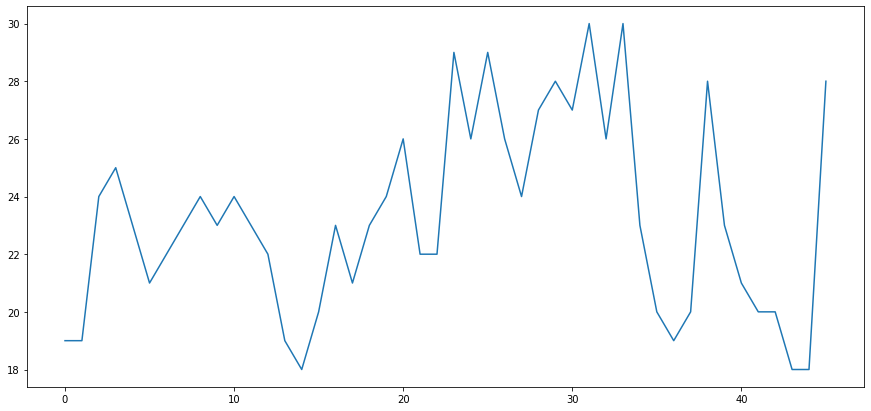

In [15]:
from pylab import rcParams
rcParams['figure.figsize'] = 15, 7
df['Temp_Min'].plot()

In [21]:
from statsmodels.tsa.stattools import adfuller
def adfuller_test(feature):
    result=adfuller(feature)
    labels = ['ADF Test Statistic','p-value','#Lags Used','Number of Observations']
    for value,label in zip(result,labels):
        print(label+' : '+str(value) )
    if result[1] <= 0.05:
        print("strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data is stationary")
    else:
        print("weak evidence against null hypothesis,indicating it is non-stationary ")

In [23]:
adfuller_test(df['Temp_Min'])

ADF Test Statistic : -3.6664527076296003
p-value : 0.004610550074222038
#Lags Used : 0
Number of Observations : 45
strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data is stationary


In [24]:
df['Sales First Difference'] = df['Temp_Min'] - df['Temp_Min'].shift(1)
df['Seasonal First Difference']=df['Temp_Min']-df['Temp_Min'].shift(12)
df.head()

,STATION CODE,LOCATIONS,STATE,Temp_Min,Temp_Max,DO_Min,DO_Max,PH_Min,PH_Max,CON_Min,...,BOD_Min,BOD_Max,NITR_Min,NITR_Max,FC_Min,FC_Max,TC_Min,TC_Max,Sales First Difference,Seasonal First Difference
0,1198,CAUVERY AT NAPOKULU BDG (D/S),KARNATAKA,19,28,6.9,7.8,7.2,8.1,32,...,1,1.8,BDL,0.50,20,83,210,410,NaN,NaN
1,1195,CAUVERY AT KUSHAL NAGAR U/S (NEAR BAICHANAHALLI),KARNATAKA,19,26,6.8,7.2,7.3,8.0,75,...,1.1,2.0,BDL,0.96,32,93,280,460,0.0,NaN
2,33,"CAUVERY AT KRS DAM, BALAMURIKSHETRA",KARNATAKA,24,28,6.9,7.4,7.7,8.3,118,...,1.2,1.5,0.32,1.70,130,340,790,1300,5.0,NaN
3,1171,"CAUVERY AT SRI RANGAPATTANNA, D/S OF ROAD BDG.",KARNATAKA,25,29,6.3,7.1,7.4,8.3,147,...,1.4,2.5,0.55,2.10,210,700,1100,1700,1.0,NaN
4,1386,CAUVERY AT D/S OF KAREKUARA VILLAGE,KARNATAKA,23,27,6.7,7.3,7.6,8.2,118,...,1.2,1.8,BDL,2.10,130,460,700,1300,-2.0,NaN


In [25]:
adfuller_test(df['Seasonal First Difference'].dropna())

ADF Test Statistic : -2.5527380688530883
p-value : 0.10316397019346946
#Lags Used : 0
Number of Observations : 33
weak evidence against null hypothesis,indicating it is non-stationary 


<AxesSubplot: >

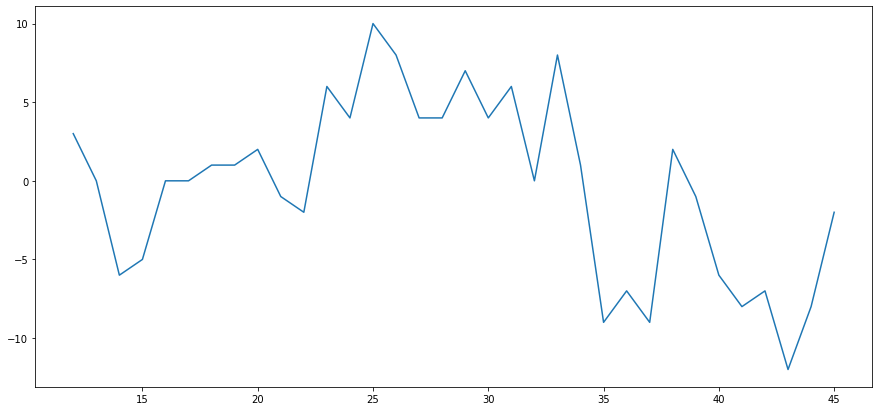

In [27]:
df['Seasonal First Difference'].plot()

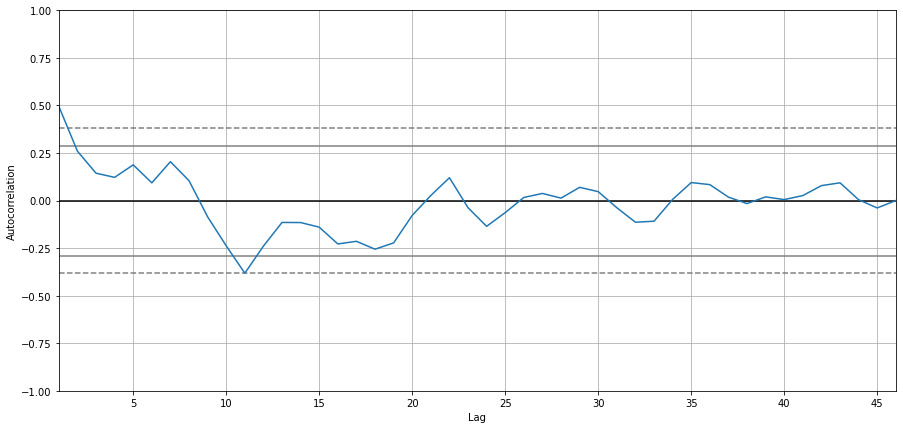

In [28]:
from pandas.plotting import autocorrelation_plot
autocorrelation_plot(df['Temp_Min'])
plt.show()

In [33]:
# For non-seasonal data
#p=1, d=1, q=0 or 1

from statsmodels.tsa.arima.model import ARIMA
model=ARIMA(df['Temp_Min'],order=(1,1,1))
model_fit=model.fit()
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:               Temp_Min   No. Observations:                   46
Model:                 ARIMA(1, 1, 1)   Log Likelihood                -113.220
Date:                Fri, 21 Apr 2023   AIC                            232.440
Time:                        15:56:53   BIC                            237.860
Sample:                             0   HQIC                           234.461
                                 - 46                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.5615      0.173      3.251      0.001       0.223       0.900
ma.L1         -0.9995      5.245     -0.191      0.849     -11.280       9.281
sigma2         8.4703     43.081      0.197      0.844     -75.968      92.908
===================================================================================
Ljung-Box (L1) (Q):                   0.03   Jarque-Bera (JB):                 3.54
Prob(Q):                              0.86   Prob(JB):                         0.17
Heteroskedasticity (H):               4.68   Skew:                             0.68
Prob(H) (two-sided):                  0.00   Kurtosis:                         2.84
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

<AxesSubplot: >

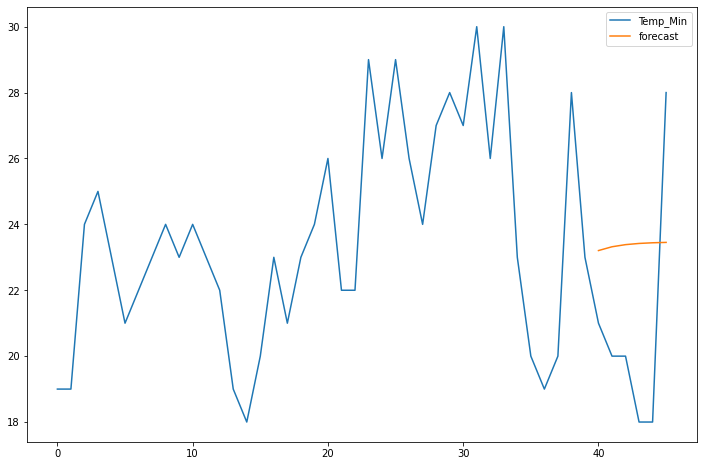

In [48]:
df['forecast']=model_fit.predict(start=40,end=55,dynamic=True)
df[['Temp_Min','forecast']].plot(figsize=(12,8))

D:\Anaconda\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


<AxesSubplot: >

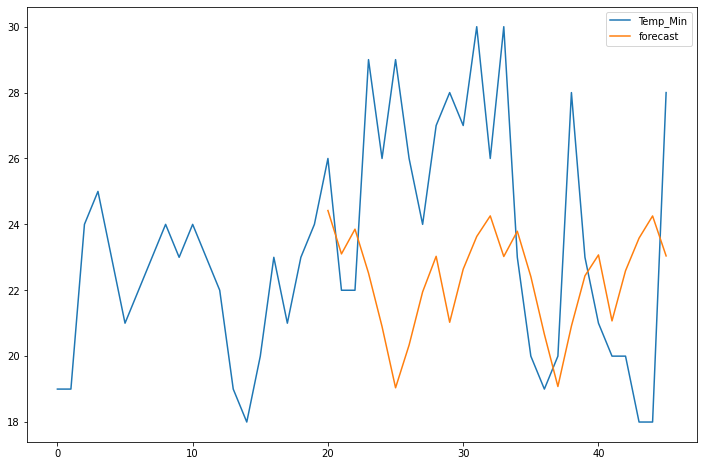

In [49]:
import statsmodels.api as sm
model=sm.tsa.statespace.SARIMAX(df['Temp_Min'],order=(1, 1, 1),seasonal_order=(1,1,1,12))
results=model.fit()
df['forecast']=results.predict(start=20,end=55,dynamic=True)
df[['Temp_Min','forecast']].plot(figsize=(12,8))